In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import pathlib # directory handling
import random
import os

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Activation

In [11]:
train_dir = "/kaggle/input/iris-computer-vision"

In [12]:
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['iris-setosa' 'iris-versicolour' 'iris-virginica']


In [13]:
len(class_names)

3

In [17]:
import matplotlib.image as mpimg

def view_random_image(target_dir, target_class):
    # set up the target directory
    target_dir = target_dir + "/"
    target_folder = target_dir + target_class
    
    #Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    #Read the image and plot the image using matplotlib
    img = mpimg.imread(target_folder + "/" +random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")
    
    print("Image shape : {}".format(img.shape))

['iris-ca2c54931b6a4683d2112d4b28ccf050c87ad915564ba7dfba41c4c68a7f01e4.jpg']
Image shape : (256, 256, 3)


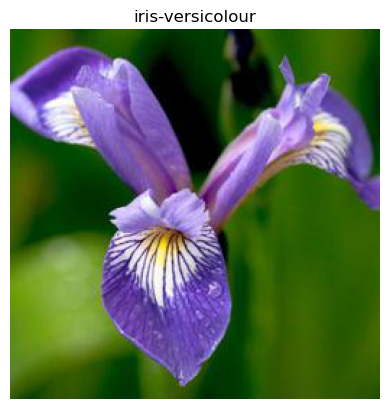

In [18]:
img = view_random_image(target_dir = train_dir,
                        target_class = random.choice(class_names))

In [19]:
random.choice(class_names) # Mengambil isi secara acak dalam list

'iris-setosa'

In [21]:
random.sample(os.listdir(train_dir+ "/" + 'iris-setosa'), 10)

['iris-2a17ce3d9678b046d5f42db47589f7eacfb916ef051293e35f2dcb1c76741069.jpg',
 'iris-8865cddb5bd6b16f8e64ac2d0417049b6a9362de67f44afa371e127ed215dfba.jpg',
 'iris-4b4ae04b89e410fe0c154f460b898909494b6ba7580806fd1f0c1fb1aac21537.jpg',
 'iris-e437a7c7ad2bbac87fef3666b40c4de1251b9c5f595183eda90a8d9b1ef5b188.jpg',
 'iris-1f941001f508ff1bd492457a90da64e52c461bfd64587a3cf7c6bf1bcb35adab.jpg',
 'iris-5638409c7854fc47775db47397a1dd6cdc1c9ec08666412d9733bbc18685af67.jpg',
 'iris-765579548dc0178b5a87d96f63a57886b85f395a4ae3ee459988d924174225c9.jpg',
 'iris-5b85818d7034982b27efa099528f0ee301dde9af368f7ffab1e606e0db8b7afd.jpg',
 'iris-e49a8f19ce5b5db6bb9fc41f9f13ec42431ec2673f00aba83645b9fdb7b79cc9.jpg',
 'iris-40d5d5b3aacd405930c5e03689455ec3001e6601daad468e28b3e65126b404ab.jpg']

In [23]:
# Rescale
train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

# Load data from directories and turn it into batches

train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size = 32,
                                               class_mode = "categorical")

Found 421 images belonging to 3 classes.


In [34]:
model = Sequential([
    Conv2D(10, 3, input_shape = (224, 224, 3)),
    Activation(activation = "relu"),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation = "relu"),
    MaxPool2D(),
    Flatten(),
    Dense(3, activation = "softmax")
])

In [35]:
model.compile(loss = "categorical_crossentropy",
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

In [36]:
tf.random.set_seed = 42
history_1 = model.fit(train_data,
                      epochs = 5,
                      steps_per_epoch = len(train_data),
                      validation_data = train_data,
                      validation_steps = len(train_data))

Epoch 1/5
14/14 [==============================] - 20s 1s/step - loss: 1.0651 - accuracy: 0.5511 - val_loss: 0.9904 - val_accuracy: 0.6390
Epoch 2/5
14/14 [==============================] - 18s 1s/step - loss: 0.9123 - accuracy: 0.6390 - val_loss: 0.8311 - val_accuracy: 0.6390
Epoch 3/5
14/14 [==============================] - 18s 1s/step - loss: 0.8128 - accuracy: 0.6485 - val_loss: 0.7411 - val_accuracy: 0.6746
Epoch 4/5
14/14 [==============================] - 19s 1s/step - loss: 0.7451 - accuracy: 0.6675 - val_loss: 0.6414 - val_accuracy: 0.7197
Epoch 5/5
14/14 [==============================] - 18s 1s/step - loss: 0.5932 - accuracy: 0.7482 - val_loss: 0.4903 - val_accuracy: 0.7838


In [37]:
model.evaluate(train_data)

14/14 [==============================] - 4s 293ms/step - loss: 0.4903 - accuracy: 0.7838


[0.49031731486320496, 0.783847987651825]

In [38]:
def plot_loss_curves(history):
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    epochs = range(len(history.history["loss"]))
    
    plt.plot(epochs, loss, label="Training Loss")
    plt.plot(epochs, val_loss, label="Validation Loss")
    plt.title("Loss")
    plt.xlabel("Epochs")
    plt.legend()
    
    plt.figure()
    plt.plot(epochs, accuracy, label="Training Accuracy")
    plt.plot(epochs, val_accuracy, label="Validation Accuracy")
    plt.title("Accuracy")
    plt.xlabel("Epochs")
    plt.legend()

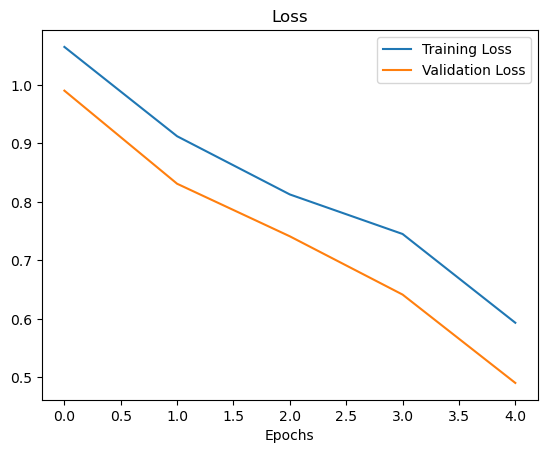

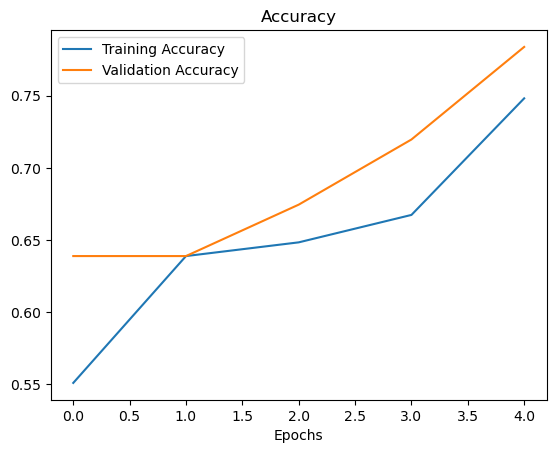

In [39]:
plot_loss_curves(history_1)

In [40]:
train_data_augmented = ImageDataGenerator(rescale=1/255.,
                                          rotation_range = 0.2,
                                          width_shift_range = 0.2,
                                          height_shift_range = 0.2,
                                          zoom_range = 0.2,
                                          horizontal_flip = True)

In [41]:
train_data_augmented = train_data_augmented.flow_from_directory(train_dir,
                                                                target_size=(224, 224),
                                                               batch_size = 32,
                                                               class_mode = "categorical")

Found 421 images belonging to 3 classes.


In [42]:
model_2 = tf.keras.models.clone_model(model) # membuat copy dari model 1 yang sudah ada

model_2.compile(loss = "categorical_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

In [44]:
history_2 = model_2.fit(train_data_augmented,
                      epochs = 5,
                      steps_per_epoch = len(train_data_augmented),
                      validation_data = train_data,
                      validation_steps = len(train_data))

Epoch 1/5
14/14 [==============================] - 22s 1s/step - loss: 1.0870 - accuracy: 0.5202 - val_loss: 0.9412 - val_accuracy: 0.6390
Epoch 2/5
14/14 [==============================] - 20s 1s/step - loss: 0.9433 - accuracy: 0.6390 - val_loss: 0.9301 - val_accuracy: 0.6390
Epoch 3/5
14/14 [==============================] - 20s 1s/step - loss: 0.9266 - accuracy: 0.6390 - val_loss: 0.9092 - val_accuracy: 0.6390
Epoch 4/5
14/14 [==============================] - 20s 1s/step - loss: 0.9108 - accuracy: 0.6390 - val_loss: 0.9075 - val_accuracy: 0.6390
Epoch 5/5
14/14 [==============================] - 20s 1s/step - loss: 0.9077 - accuracy: 0.6390 - val_loss: 0.8828 - val_accuracy: 0.6390


In [45]:
model_2.evaluate(train_data)

14/14 [==============================] - 4s 286ms/step - loss: 0.8828 - accuracy: 0.6390


[0.8827779293060303, 0.6389548778533936]

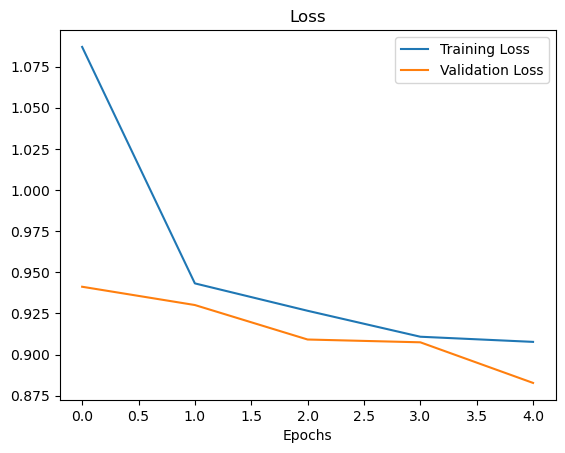

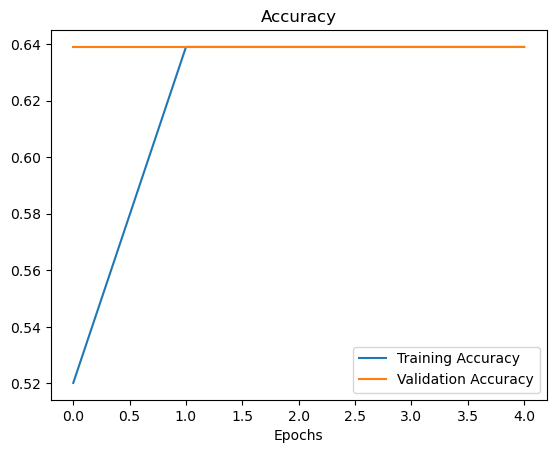

In [46]:
plot_loss_curves(history_2)